# TD : Apprentissage automatique - Approches bayésienne et linéairement discriminantes

Dans ce TD, nous nous proposons de travailler sur trois objectifs principaux : tout d'abord, une familiarisation avec la gestion de données ; ensuite, la mise en œuvre d'une démarche de conception par apprentissage d'un classifieur sur des problèmes de petite taille, mais parfois de grande dimension ; et enfin, une prise en main des outils logiciels classiques en Machine Learning et Data Science.



______

# Introduction: Les ressources logicielles utiles
______

Dans ce TD, on utilise les ressources de calcul et l'environnement logiciel Python proposés par [Colab](https://colab.research.google.com/).

Les données seront accessibles depuis le site [openML](https://www.openml.org/) et seront téléchargées directement depuis ce site.

Il sera fait usage de la bibliothèque [scikit-learn](http://scikit-learn.org/stable/modules/classes.html) qui contient la plupart des algorithmes d'apprentissage classiques dans un format unifié. D'autres bibliothèques utiles sont [pandas](https://pandas.pydata.org/) (manipulation de données) et [seaborn](https://seaborn.pydata.org/) (fonctions de visualisation).



______

# Partie 1: Les données
______

On se propose dans cette première partie de construire une démarche d'apprentissage sur un problème simple, et de programmer les algorithmes vus dans le cours (approches discriminantes et génératives).

Chaque jeu de données est constitué de quatre ensembles :
* Un ensemble de données test utilisées pour l'apprentissage : X_train
* Un ensemble de classes associées aux données d'apprentissage : y_train
* Un ensemble de données à tester : X_test
* Un ensemble de classes associées aux données de test : y_test

Les données de test ne doivent pas être utilisées pour l'apprentissage proprement dit, seulement pour son évaluation.


## Familiarisation avec les données

On se propose de réaliser une classification binaire d'un ensemble de données en utilisant.

Le problème est une classification binaire pour détecter des billets de banque frauduleux. Les données source d'origine sont accessibles [ici](https://www.openml.org/search?type=data&status=active&id=1462).

L'objectif est de dérouler les différentes étapes d'une démarche d'apprentissage automatique:
1. Constitution de la base d'apprentissage
2. Visualisation et analyse des données
3. Choix d'une approche
4. Optimisation (apprentissage des paramètres du prédicteur)
5. Evaluation


### Base d'apprentissage

In [ ]:
# Librairies scientifique et visualisation utiles standard
import numpy as np
import matplotlib.pyplot as plt

# API pour récupérer les données sur openml.org
!pip install openml --quiet
import openml

#### Chargement des données et répartition en ensemble  d'apprentissage et de test

In [ ]:
# Pour séparer les données en apprentissage et test
from sklearn.model_selection import train_test_split

# Pour visualiser  les données
def show_data_2D(X,Y):
    np.unique(Y)
    fig, ax = plt.subplots(figsize=(8, 6))
    for id in np.unique(Y):
        idpositive=np.nonzero(Y == id)[0]
        ax.scatter(X[idpositive,0], X[idpositive,1], s=50)

# Chargement des données et constitution de la base d'apprentissage
dataset = openml.datasets.get_dataset('banknote-authentication')

# Get the data itself as a dataframe (or otherwise)
data_all, _, _, names = dataset.get_data(dataset_format="array")
print("Nom des colonnes: ", names)

y = data_all[:,-1]
X = data_all[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.8)

# Données d'apprentissage réparties en fonction des classes
X0 = X_train[y_train == 0,:]
X1 = X_train[y_train == 1,:]

ndim = X_train.shape[1]
ntrain = y_train.shape[0]

print("Les données sont de dimension {:d}".format(ndim))
print("Le nombre de données d'apprentissage est {:d}".format(ntrain))


Nom des colonnes:  ['V1', 'V2', 'V3', 'V4', 'Class']
Les données sont de dimension 4
Le nombre de données d'apprentissage est 274


<ipython-input-42-f22a8f40bdb8>:16: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  data_all, _, _, names = dataset.get_data(dataset_format="array")


Le jeu de données, comporte les colonnes `V1`, `V2`, `V3`, `V4`, et `Class`, a été chargé avec succès. Après séparation des données, on observe que celles-ci possèdent 4 caractéristiques (ou dimensions). Le nombre total de données d’apprentissage est de 274, réparties selon les classes cibles.


### Visualisation des données

Affichage d'un nuage de points pour visualiser la distribution 2D des classes sur deux dimensions spécifiées, suivi d'histogrammes montrant la répartition des valeurs de la première dimension pour chaque classe.


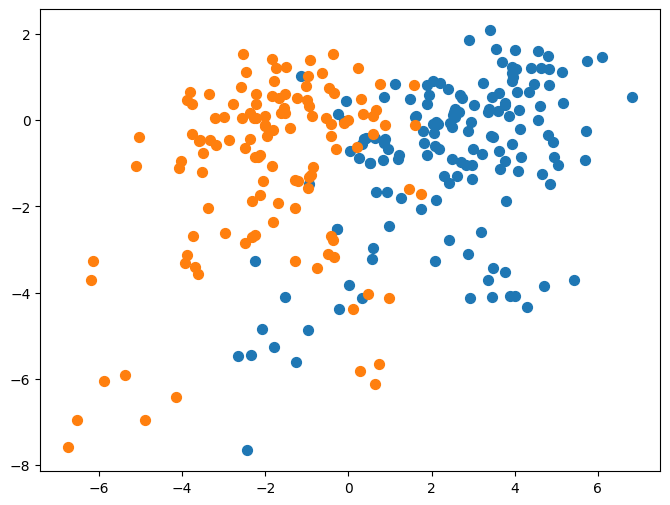

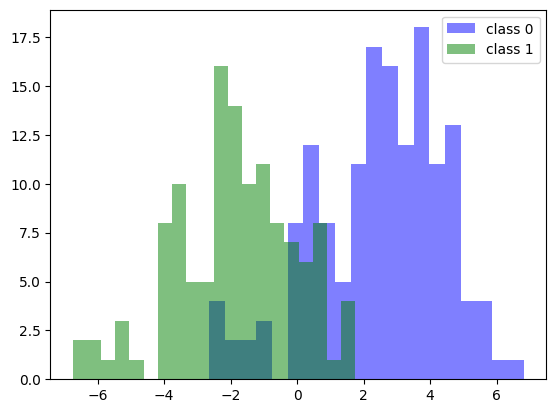

In [ ]:
# Dimensions à étudier (à répéter pour d'autres dimensions)
feat1 = 0
feat2 = 3

# Distributions 2D
show_data_2D(X_train[:,[feat1, feat2]], y_train)
plt.show()

# Visualise les distributions pour un attribut
a0 = X0[:,feat1]
a1 = X1[:,feat1]

# Histogrammes des valeurs d'attributs pour chacune des classes
plt.hist(a0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(a1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()



### Autre manière de visualiser directement les données (en utilisant seaborn+pandas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float32
 1   V2      1372 non-null   float32
 2   V3      1372 non-null   float32
 3   V4      1372 non-null   float32
 4   class   1372 non-null   int64  
dtypes: float32(4), int64(1)
memory usage: 32.3 KB


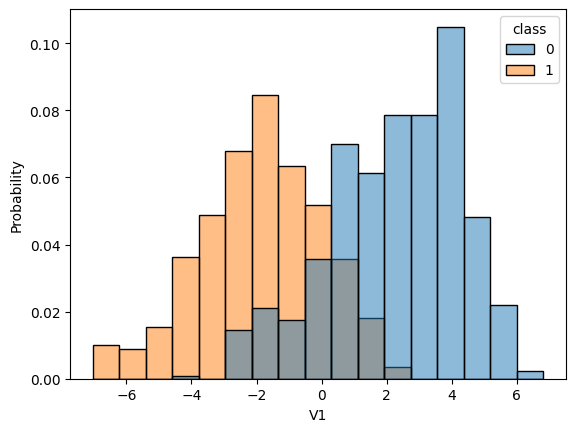

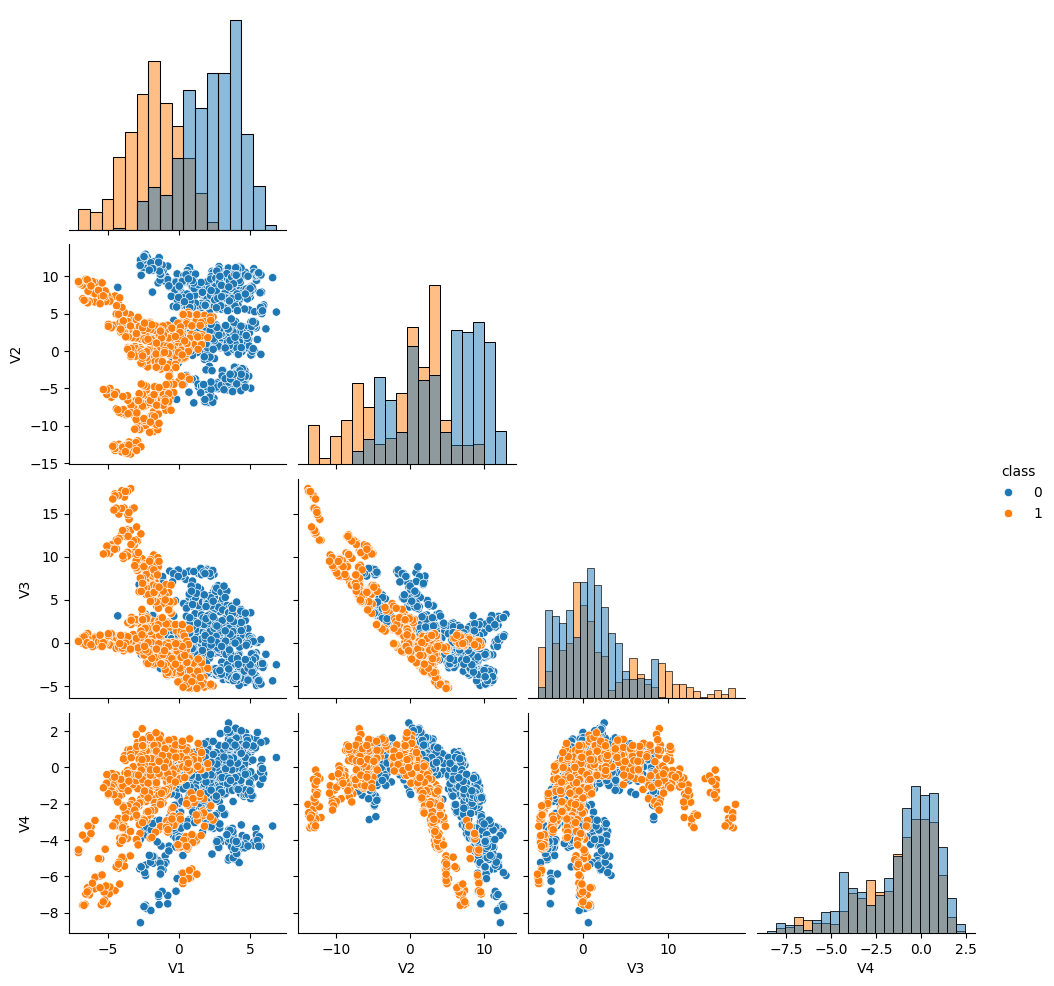

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(X, columns=names[:-1])
df['class'] = np.int64(y)

df.info()

sns.histplot(data=df, x='V1', hue='class', stat='probability')

sns.pairplot(df, hue='class',diag_kind="hist",corner=True)

Les graphiques présentent une exploration visuelle des données "Banknote Authentication". Le premier montre des histogrammes univariés pour l'attribut `V1`, illustrant la distribution des classes (0 en bleu et 1 en orange). Le second, un pairplot, visualise les relations 2D entre des attributs comme `V1`, `V2`, et `V3`, révélant une séparation partielle entre les classes. Enfin, le troisième illustre toutes les combinaisons d'attributs avec des distributions et des scatterplots, facilitant l'analyse de leur séparabilité.


## Construire une "baseline"

Nous construisons ici une "baseline" en ajustant une distribution statistique (normale) à une caractéristique spécifique des données (`feat1`, ici `V1`) pour deux classes distinctes. Les paramètres de la distribution sont estimés séparément pour chaque classe (`a0` pour la classe 0, `a1` pour la classe 1). Les histogrammes normalisés des données observées sont affichés avec les courbes des PDF ajustées superposées, illustrant la répartition des données et leur ajustement à la distribution choisie.



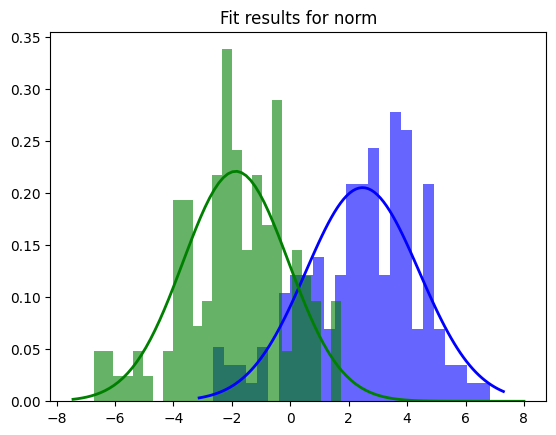

In [ ]:
# Choix de la distribution
from scipy.stats import laplace, expon, norm, gamma, beta, cauchy, logistic

# Définit le type de distribution
distrib=norm

# Choix de la caractéristique
feat1 = 0
a0 = X0[:,feat1]
a1 = X1[:,feat1]

# Visualise les distributions pour une caractéristique
plt.clf()

data = a0
param = distrib.fit(data)

# Visualise l'histogramme
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

# Visualise la PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = distrib.pdf(x, *param)
plt.plot(x, p, 'b', linewidth=2)

data = a1
param = distrib.fit(data)

# Visualise l'histogramme
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Visualise la PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = distrib.pdf(x, *param)
plt.plot(x, p, 'g', linewidth=2)

title = "Fit results for %s" % distrib.name
plt.title(title)

plt.show()


## Étape de Classification : Utilisation des Distributions Statistiques et de la Loi de Bayes

Une fois le type de distribution choisi (ici, la distribution normale), nous construisons une étape de classification simple en calculant le signe du log-rapport des probabilités a posteriori :

$$\log(P[y=1|x]) - \log(P[y=0|x])$$

### Rappel de la Loi de Bayes
La loi de Bayes permet de calculer les probabilités a posteriori :

$$P[y|x] = \frac{P[x|y] \cdot P[y]}{P[x]}$$

### Étapes Implémentées
1. **Estimation des Paramètres des Distributions:**  
   Les log-vraisemblances conditionnelles $\log(P[x|y])$
 sont calculées en ajustant des modèles de distribution aux données d'entraînement pour chaque classe. Cela permet de modéliser la répartition des attributs dans chaque classe.

2. **Prise en Compte des Lois A Priori:**  
   Le ratio des probabilités a priori $\frac{P[y=1]}{P[y=0]}$
 est calculé à partir des proportions des échantillons appartenant à chaque classe dans la base d'apprentissage. Cette étape reflète les déséquilibres de classe dans les données.

3. **Construction du Prédicteur:**  
   Les log-vraisemblances des données de test sont calculées en fonction des distributions ajustées pour chaque classe. Le log-rapport des probabilités a posteriori est obtenu en soustrayant les log-vraisemblances des deux classes, tout en tenant compte des probabilités a priori. La classification est ensuite réalisée en fonction du signe de ce log-rapport.

4. **Évaluation du Modèle:**  
   Les prédictions sont comparées à la vérité terrain pour évaluer le taux d'erreur de classification.



In [ ]:
import math

# Calcul des log prior
logprior = math.log((y_train==0).sum()/(y_train==1).sum())

# Choix de la caractéristique
feat1 = 0

# Données d'apprentissage
a0 = X0[:,feat1]
a1 = X1[:,feat1]

# Données de test
at = X_test[:, feat1]

distrib = norm # ou une autre distribution

# Estimation des paramètres des lois et prédiction sur données de test

# Fonction d'estimation des paramètres du modèle et de calcul de la log vraisemblance
def compute_llk(a_train, a_test, distrib=norm):
  # Estime les maramètres de la distribution
  param = distrib.fit(a_train)
  # Calcule la log vraisemblance pour les données de test
  llk = distrib.logpdf(a_test, *param)

  return llk, param

# Calcule les log vraisemblances pour les données de test
l0t,_ = compute_llk(a0, at, distrib)
l1t,_ = compute_llk(a1, at, distrib)

z_pred = l1t - l0t - logprior

# Prédit en fonction du signe du rapport des probabilités a posteriori z_pred (à calculer)
y_pred = (z_pred > 0).astype('int')

# Calcul de l'erreur de prédiction (comparaison avec la vérité terrain y_test)
erreur = (y_pred != y_test).sum() / y_test.size

print("L'erreur de prédiction est {:.1f}%".format(100*erreur))



L'erreur de prédiction est 15.9%


Le **taux d'erreur (Prediction error)** obtenu est **15.9%**.

**Visualisation des log probabibilités**

On visualise les distributions des log probabilités par des histogrammes pour rendre compte de la capacité du prédicteur à les discriminer.


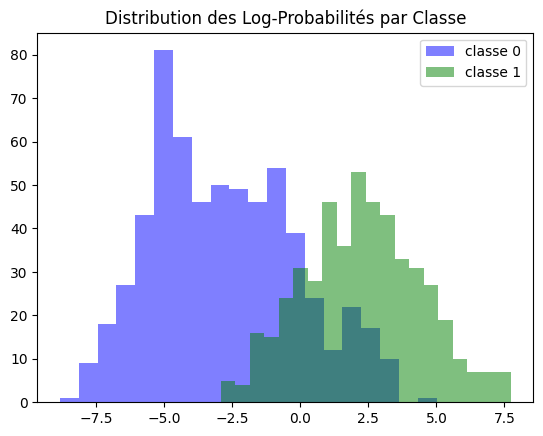

In [ ]:
# Visualisation des log-probabilités par histogrammes
Z0 = z_pred[y_test == 0]
Z1 = z_pred[y_test == 1]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['classe 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['classe 1'])
plt.legend(loc='upper right')
plt.title('Distribution des Log-Probabilités par Classe')
plt.show()



Le taux d'erreur de **15.9%** indique que le classifieur a commis des erreurs dans environ 16% des prédictions sur l'ensemble de test. Ce résultat peut être attribué à plusieurs facteurs, tels que l'hypothèse de normalité des données, le possible déséquilibre des classes, ou la simplicité du modèle basé sur la loi de Bayes, qui ne prend pas en compte des relations complexes entre les variables. En observant la visualisation des log-probabilités par classe, on peut noter un chevauchement significatif entre les distributions des log-probabilités des classes 0 et 1. Ce chevauchement peut expliquer une partie des erreurs de classification, car il rend difficile pour le classifieur de séparer clairement les deux classes.





---


# Partie 2: Comparaison des approches génératives et discriminantes




---

Dans cette partie, nous allons tester différentes approches d'apprentissage qui prennent en compte la nature multivariée des données. On a vu en effet dans la section précédente que chaque attribut ou caractéristique pris individuellement était peu discriminant.

Deux types d'approches permettent de construire des prédicteurs multi-variés: génératives, qui s'appuient sur une modélisation des données, et discriminantes, qui estiment directement les paramètres du prédicteur.


## Modèles génératifs

Nous allons tester deux types de modèles génératifs qui s'appuient sur une estimation des probabilités a posteriori pour construire la fonction de prédiction: la modélisation gaussienne multivariée, et l'approchche bayésienne naïve.

### Modélisation gaussienne multi-variée

Dans cette approche, l'objectif est d'estimer les paramètres d'un modèle gaussien multi-varié à partir des données d'apprentissage, et ensuite de comparer les probabilités a posteriori.

Le modèle Gaussien multi-varié est défini par la fonction [`multivariate_normal`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal) et prend comme arguments les moyennes et covariance qu'il faut estimer par ailleurs, par exemple en utilisant les fonctions numpy [`mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [`cov`](https://numpy.org/doc/stable/reference/generated/numpy.cov.html).

D'autres méthodes plus robustes peuvent être utilisées pour estimer la [matrice de covariance](https://scikit-learn.org/stable/modules/covariance.html#covariance).

In [ ]:
import math
from scipy.stats import multivariate_normal

# Calcul des log prior
logprior = math.log((y_train==0).sum()/(y_train==1).sum())

# Calcul des moyennes et covariances
cc0=np.cov(np.transpose(X0))
mm0=np.mean(X0,axis=0)

cc1=np.cov(np.transpose(X1))
mm1=np.mean(X1,axis=0)

# Apprentissage des lois et prédiction sur données de test

d0 = multivariate_normal(mean=mm0, cov=cc0)
d1 = multivariate_normal(mean=mm1, cov=cc1)

lk0=d0.logpdf(X_test)
lk1=d1.logpdf(X_test)

z_pred = lk1 - lk0 - logprior

y_pred = (z_pred > 0).astype('int')


# Evaluation
erreur = (y_pred != y_test).sum() / y_test.size

print("Gaussien multivarié: L'erreur de prédiction est {:.1f}%".format(100*erreur))


Gaussien multivarié: L'erreur de prédiction est 2.0%


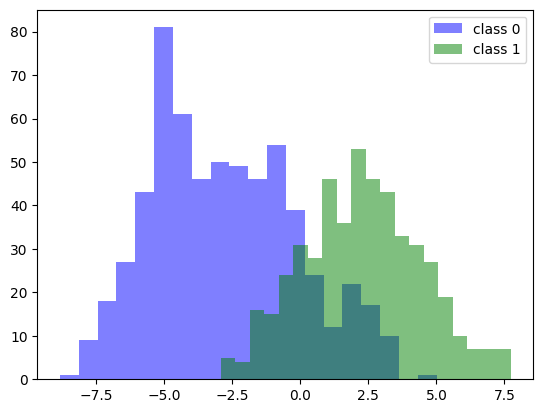

In [ ]:
# Visualisation de la valeur de la fonction de décision

Z0 = z_pred[y_test==0]
Z1 = z_pred[y_test==1]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()



L'approche **Gaussienne multivariée** a obtenu un taux d'erreur de **2.0%**, ce qui montre une excellente performance. Le modèle réussit bien à séparer les classes grâce à l'estimation des moyennes et covariances, et la visualisation des log-probabilités montre une séparation claire des distributions des deux classes.


### Bayésien naïf

On se propose à partir de maintenant d'utiliser la librarie [scikit-learn](http://scikit-learn.org/stable/modules/classes.html) qui contient un grand nombre d'algorithmes d'apprentissage et une interface "orientée objet" facile d'utilisation.

Toutes les méthodes contiennent les fonctions suivantes:
* `fit`: pour apprendre/estimer les paramètres du modèle.
* `predict`: pour prédire (classe, valeur) à partir du modèle appris.
* `score`: pour calculer les performances du prédicteur.


Le principe du bayésien naïf est d'estimer la loi conditionnelle $P[x_i | y]$ pour les différentes hypothèses $y\in\{0,1\}$ et chaque caractéristique $x_i$ et d'appliquer ensuite l'inversion bayésienne avec hypothèse d'indépendance pour calculer la probabilité (ou log probabilité) a posteriori pour chacune des classes $y$ et une donnée à prédire $\mathbf{x}$.

$$\log P[y|\mathbf{x}] \propto \sum_{i=1}^d \log P[x_i|y] + \log P[y]$$

L'apprentissage consiste donc à estimer un bon modèle de la distribution de chaque caractéristique (binomiale, multinomiale, gaussienne, histogram, mélange de gaussienne...)

Regarder les différents modèles ["bayésiens naïfs"](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) de scikit-learn et déterminer la bonne classe à appliquer, et si elle est applicable, en fonction de l'allure des distributions de caractéristiques étudiées dans la partie 1.

Comme les caractéristiques des données sont approximativement distribuées selon une loi normale (gaussienne) ( `Partie 1`), on doit utiliser le modèle **`GaussianNB`** de scikit-learn qui suppose que les caractéristiques sont indépendantes et suivent une distribution normale.


In [ ]:
from sklearn.naive_bayes import GaussianNB

#Coder les étapes d'apprentissage et de prédiction sur les données de test

# Définition du modèle
clf =  GaussianNB() # code à compléter

# Calcul des paramètres du modèle
clf.fit(X_train, y_train) # code à compléter

# Estimation du log du ratio des probabilités a posteriori
logproba = clf.predict_log_proba(X_test) # code à compléter

# Construction du test
z_pred = logproba[:,1] - logproba[:,0] # code à compléter

# Prédiction
y_pred = (z_pred > 0).astype(int)

# Evaluation de l'erreur de la prédiction y_pred
erreur = (y_pred != y_test).sum() / y_test.size

print("Bayésien naïf: L'erreur de prédiction est {:.2f}%".format(100*erreur))

# Autre manière de calculer l'erreur directement (fonction score = predict + evaluation)
print("Bayésien naïf: L'erreur de prédiction est {:.2f}%".format(100*(1-clf.score(X_test, y_test))))


Bayésien naïf: L'erreur de prédiction est 17.85%
Bayésien naïf: L'erreur de prédiction est 17.85%


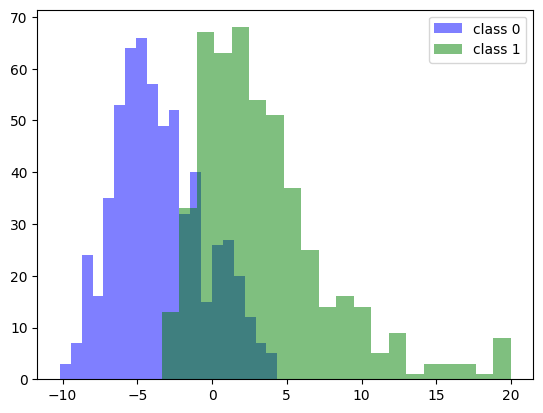

In [ ]:
#Visualisation du log du ratio des probabilités selon les classes

Z0 = z_pred[y_test == 0]
Z1 = z_pred[y_test == 1]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()

La différence de performance peut être expliquée par le fait que le **Gaussien multivarié** modélise les dépendances entre les caractéristiques en utilisant une matrice de covariance, ce qui lui permet de capturer les relations complexes entre les variables. En revanche, le **Bayésien naïf** suppose l'indépendance conditionnelle des caractéristiques, ce qui limite sa capacité à modéliser les corrélations entre elles, entraînant une performance moins optimale.



## Modèles discriminants

On a vu dans le cours trois manière d'estimer un modèle discriminant **linéaire**:

* moindres carrés
* régression logistique
* analyse discriminante avec critère de Fisher

On va les étudier dans la suite de cette section.

### Moindres carrés

Le code ci-dessous construit la fonction de prédiction en utilisant la fonction de régression linéaire [`linear_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).


Moindres carrés: L'erreur de prédiction est 3.19%


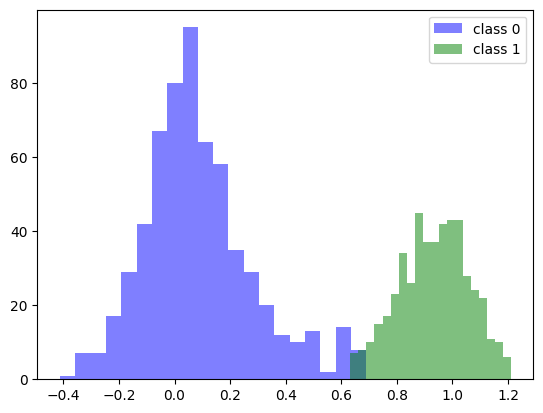

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

# Augmentation de la dimension des données pour estimer le biais
X_train1 = np.hstack((X_train,np.ones((X_train.shape[0], 1)) ))
X_test1 = np.hstack((X_test,np.ones((X_test.shape[0], 1)) ))

# Apprentissage
reg.fit(X_train1, y_train)
w_reg = reg.coef_

# Prédiction
z_pred = reg.predict(X_test1)
y_pred = (z_pred > 0.5).astype(int)

# Evaluation
erreur = (y_pred != y_test).sum() / y_test.size

print("Moindres carrés: L'erreur de prédiction est {:.2f}%".format(100*erreur))

# Visualisation des distributions de données d'apprentissage projetées sur la direction discriminante
Z0 = z_pred[y_test == 0]
Z1 = z_pred[y_test == 1]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()


### Réalisation de la prédiction

La prédiction dans cette approche de **moindres carrés** est réalisée en ajustant un modèle de régression linéaire sur les données d'entraînement. Les caractéristiques sont augmentées d'une colonne de biais (une constante de 1) pour tenir compte de l'ordonnée à l'origine. Le modèle apprend ensuite les coefficients de régression qui minimisent l'erreur quadratique entre les valeurs prédites et réelles. Pour prédire la classe d'un exemple dans l'ensemble de test, une fois les coefficients appris, le modèle calcule une valeur continue, puis applique un seuil de 0,5 pour la décision : si la prédiction est supérieure à 0,5, l'exemple est classé dans la classe 1, sinon dans la classe 0.

### Amélioration des performances
Les performances du modèle peuvent être améliorées en utilisant, par exemple, la régression logistique, qui est le sujet de la prochaine section.


### Régression logistique

La régression logistique consiste à estimer directement la loi a posteriori par une forme linéaire. Ses paramètres peuvent être calculés en utilisant la fonction
[`LogisticRregression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) de scikit-learn.

###  Construction du prédicteur, estimation de ses performances et visualisation de la distribution des données dans l'espace de décision.

Dans scikit-learn, on peut accéder à l'espace de décision (avant prédiction) par `decision_function` (pour générer `z_pred`).


Régression logisitique: L'erreur de prédiction est 1.28%


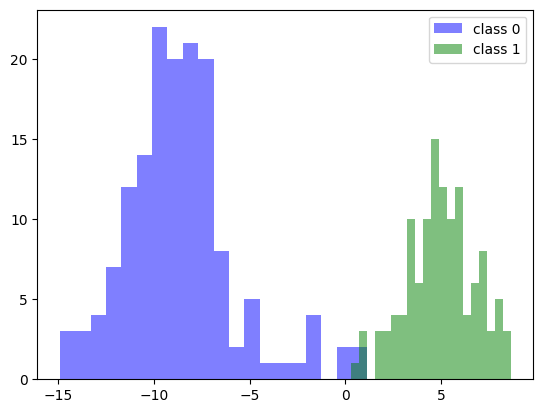

In [ ]:
from sklearn.linear_model import LogisticRegression

# Apprentissage, prédiction et évaluation
clf = LogisticRegression().fit(X_train, y_train)
print("Régression logisitique: L'erreur de prédiction est {:.2f}%".format(100*(1-clf.score(X_test, y_test))))

z_pred = clf.decision_function(X_train)

Z0 = z_pred[y_train == 0]
Z1 = z_pred[y_train == 1]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()


### Analyse discriminante (Fisher)

L'analyse discriminante utilisant le critère de contraste de Fisher pour un problème à deux classes consiste à calculer la direction discriminante $\mathbf{w}$ selon
$$\mathbf{w} = S_I^{-1}.(\mathbf{\mu}_1 - \mathbf{\mu}_0)$$
où $\mu_k$ est la moyenne des données pour la classe $k$ et la matrice $S_I$ mesure la disparité intra-classe et vaut $\Sigma_0 + \Sigma_1$, la somme des matrices de covariance de chacune des classes.

Fisher LDA: L'erreur de prédiction est 0.8%


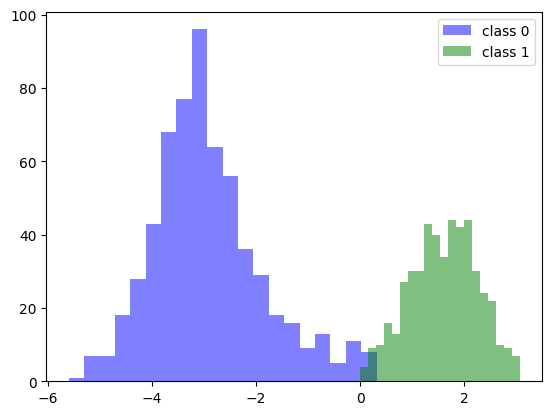

In [ ]:
from numpy.linalg import inv, norm

cc0=np.cov(np.transpose(X0))
mm0=np.mean(X0,axis=0)

cc1=np.cov(np.transpose(X1))
mm1=np.mean(X1,axis=0)

# Calcul de la direction discriminante
w=np.dot(inv(cc1+cc0),mm1-mm0)

#Normalisation
w = w / norm(w)

# Calcul du seuil (avec hypothèse Gaussienne)
mm = ((y_train==0).sum()*mm0+(y_train==1).sum()*mm1)/y_train.size
b = np.dot(w,mm)

# en regardant les distributions
b=-0.9

# Prédiction (w est la direction, b est le biais)
z_pred = np.dot(X_test, w) - b
y_pred = (z_pred>0).astype(int)

print("Fisher LDA: L'erreur de prédiction est {:.1f}%".format(100*(y_pred != y_test).sum() / y_test.size))

Z0 = z_pred[y_test == 0]
Z1 = z_pred[y_test == 1]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()


Une autre manière d'implémenter une analyse discriminante linéaire est d'utiliser la fonction  [`LinearDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)de scikit-learn. Cette version fait l'hypothèse que les matrices de covariance pour les deux classes sont identiques comme c'est le cas.

Sous cette hypothèse, la direction discriminante est la même que celle obtenue par moindre carré . Elle est accessible comme une variable `coef_` du modèle.


### Visualisation des distributions dans l'espace de décision

Analyse discriminante: L'erreur de prédiction est 3.19%
Produit scalaire entre directions discriminantes:  [0.99999997]
Direction obtenue avec LinearDiscriminantAnalysis :  [[-0.7306031  -0.42412704 -0.53339505 -0.04272036]]
Direction obtenue par moindre carré:  [-0.73060301 -0.42412712 -0.53339516 -0.04272043]


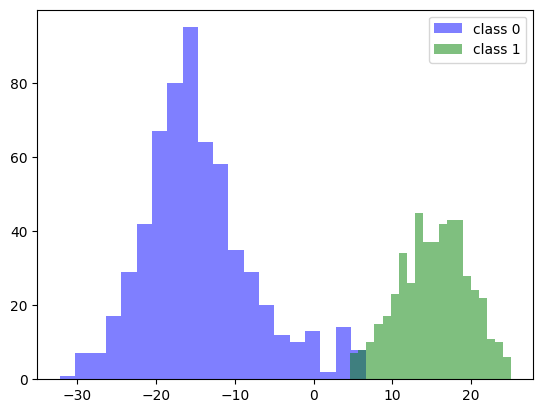

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
print("Analyse discriminante: L'erreur de prédiction est {:.2f}%".format(100*(1-clf.score(X_test, y_test))))

z_pred = clf.decision_function(X_test)

# Calcul du produit scalaire entre directions discriminantes (vecteurs normés)
print("Produit scalaire entre directions discriminantes: ", np.dot(clf.coef_/ norm(clf.coef_), w_reg[:-1]/norm(w_reg[:-1])))

print("Direction obtenue avec LinearDiscriminantAnalysis : ", clf.coef_/ norm(clf.coef_))
print("Direction obtenue par moindre carré: ", w_reg[:-1]/norm(w_reg[:-1]))

Z0 = z_pred[y_test == 0]
Z1 = z_pred[y_test == 1]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()


# Partie 3: Autres jeux de données

On se propose dans cette partie de comparer les comportements des prédicteurs étudiés précédemment sur d'autres jeux de données.

## Un dataset de taille intermédiaire
Ce [jeu de données](https://www.openml.org/search?type=data&sort=runs&id=1471&status=active) est un peu plus grand que le précédent (détection de faux billets) mais de plus grande taille. Il a pour objectif de prédire à partir de signaux d'électro-encéphalogramme si les yeux sont ouverts ou fermés.

On cherchera donc encore ici à réaliser une classification parmi deux hypothèses.


In [ ]:
import openml
# Get dataset by name
dataset = openml.datasets.get_dataset('eeg-eye-state')

# Get the data itself as a dataframe (or otherwise)
data_all, _, _, names = dataset.get_data(dataset_format="array")

y = data_all[:,-1]
X = data_all[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.8)


X0 = X_train[y_train == 0,:]
X1 = X_train[y_train == 1,:]

print("Les données sont de dimension {:d}".format(X_train.shape[1]))
print("Le nombre de données d'apprentissage est {:d}".format(y_train.shape[0]))


Les données sont de dimension 14
Le nombre de données d'apprentissage est 2996


<ipython-input-55-129de9ed5b4c>:6: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  data_all, _, _, names = dataset.get_data(dataset_format="array")


### Visualisation des données

Le code ci-dessous visualise les distributions des caractéristiques du jeu de données en deux étapes : d'abord, il affiche une distribution bidimensionnelle entre deux caractéristiques spécifiques (8 et 13) pour observer la séparation entre les classes ; ensuite, il crée des histogrammes pour chaque caractéristique individuellement, comparant les valeurs de chaque classe. Cela permet d'analyser la capacité discriminante de chaque caractéristique et d'évaluer la difficulté de séparer les classes dans les différentes dimensions.


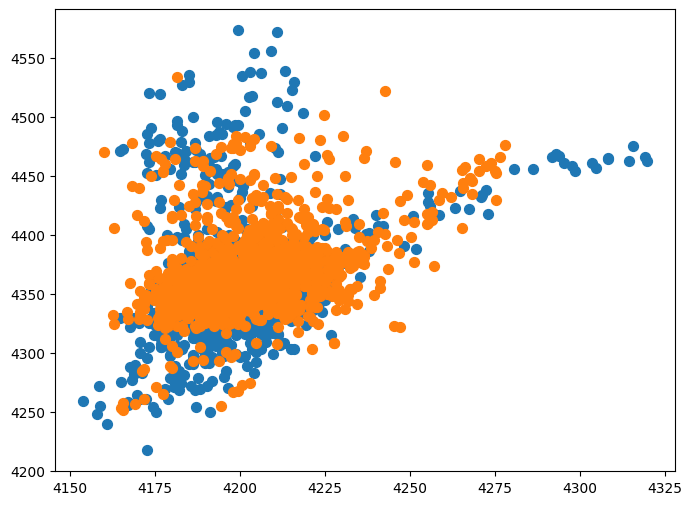

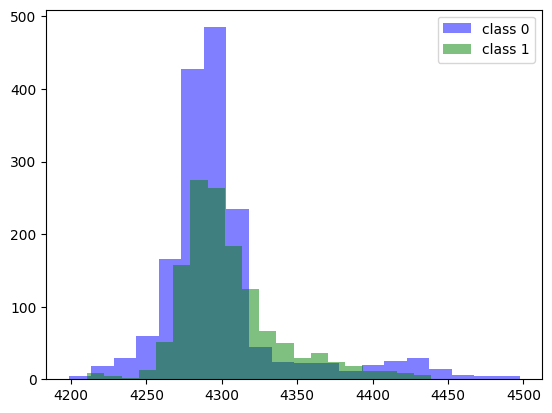

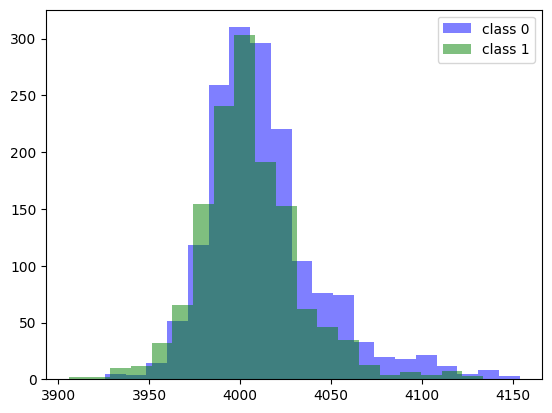

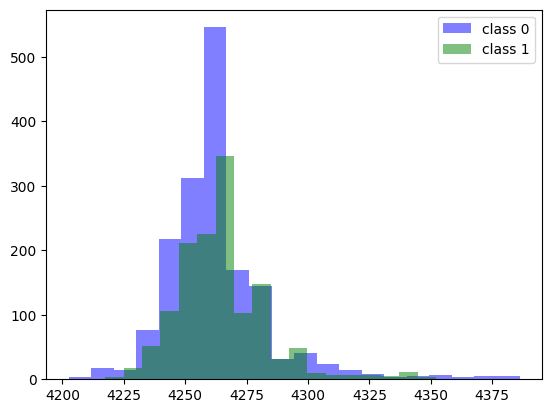

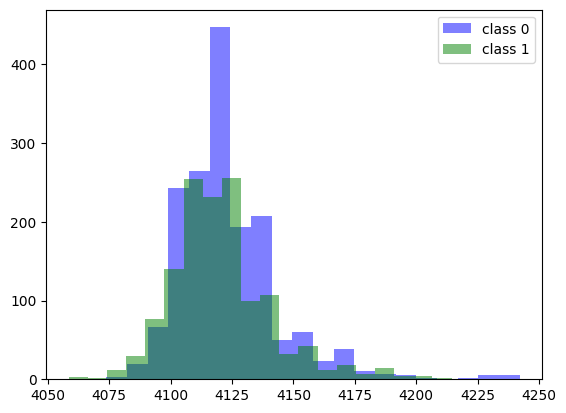

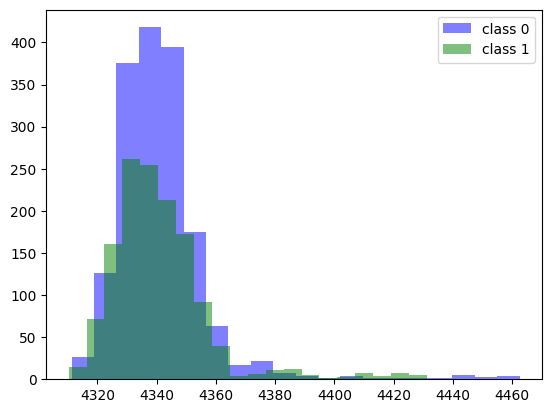

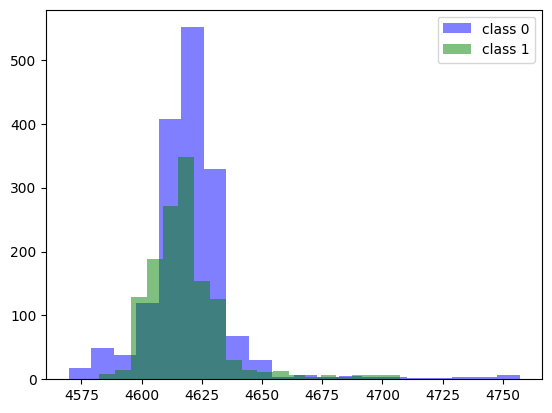

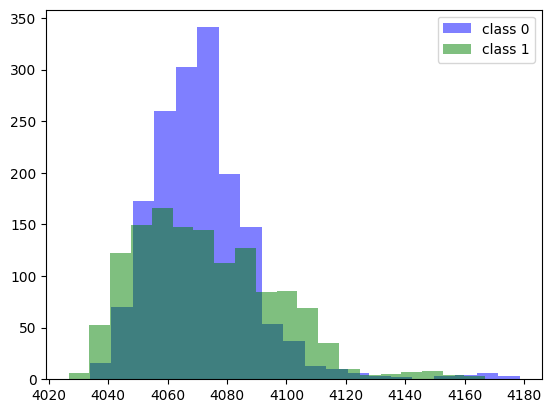

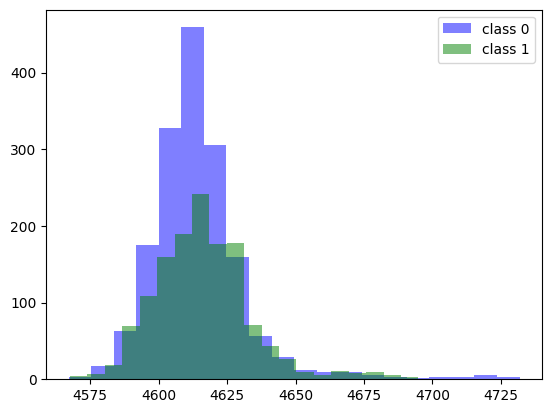

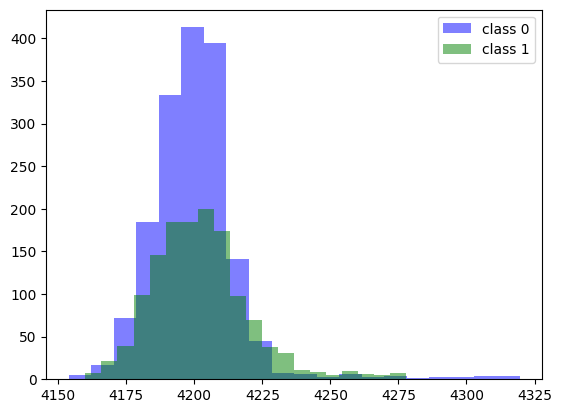

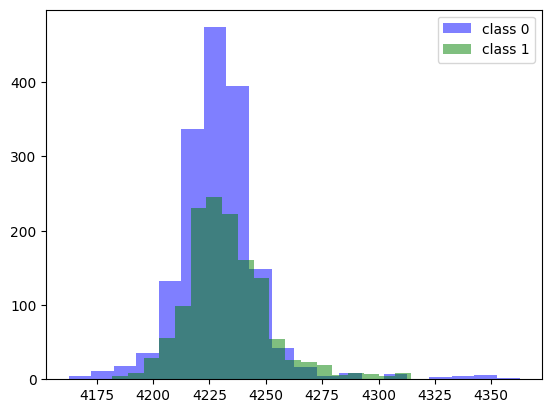

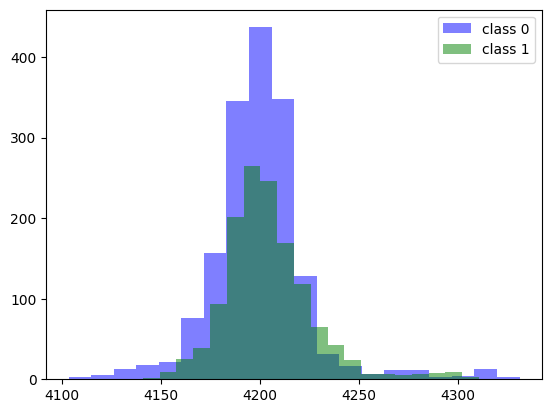

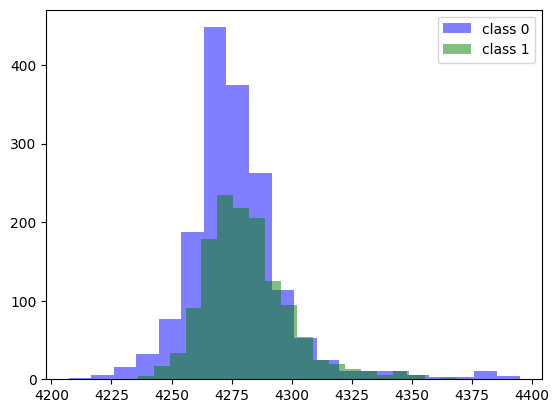

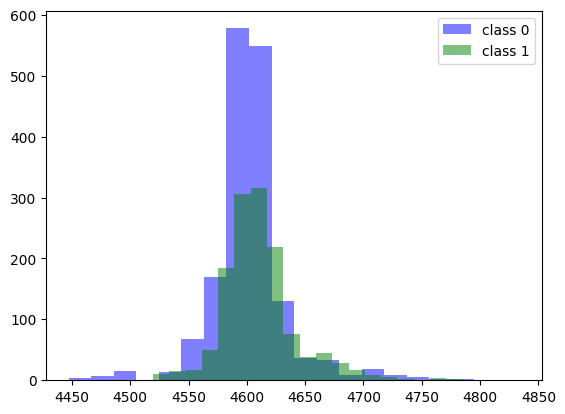

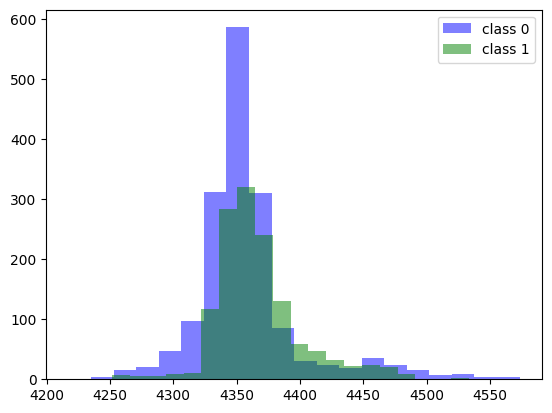

In [ ]:
# Dimensions à étudier (à répéter pour d'autres dimensions)
feat1 = 8
feat2 = 13

# Distributions 2D
show_data_2D(X_train[:,[feat1, feat2]], y_train)
plt.show()

for feat1 in range(X_train.shape[1]):
  # Visualise les distributions pour un attribut
  a0 = X0[:,feat1]
  a1 = X1[:,feat1]

  plt.hist(a0, color='b', alpha=0.5, bins=20, label=['class 0'])
  plt.hist(a1, color='g', alpha=0.5, bins=20, label=['class 1'])
  plt.legend(loc='upper right')
  plt.show()

### Analyse discriminante

L'erreur de prédiction est 36.00%


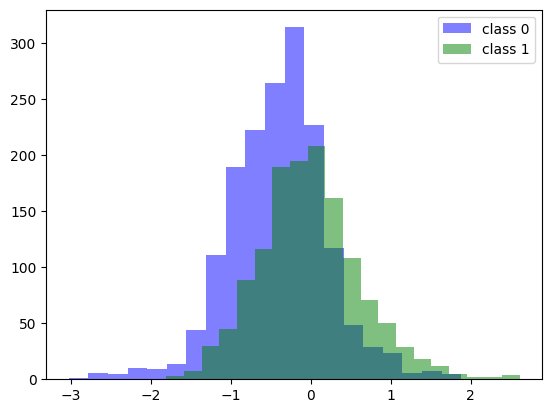

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

clf.fit(X_train, y_train)
print("L'erreur de prédiction est {:.2f}%".format(100*(1-clf.score(X_test, y_test))))

z_pred = clf.decision_function(X_train)

Z0 = z_pred[y_train == 0]
Z1 = z_pred[y_train == 1]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()


### Gaussien multivarié

In [ ]:
from scipy.stats import multivariate_normal

X0 = X_train[y_train == 0,:]
X1 = X_train[y_train == 1,:]

cc0=np.cov(np.transpose(X0))
mm0=np.mean(X0,axis=0)
d0 = multivariate_normal(mean=mm0, cov=cc0)

cc1=np.cov(np.transpose(X1))
mm1=np.mean(X1,axis=0)
d1 = multivariate_normal(mean=mm1, cov=cc1)

lk0=d0.logpdf(X_test)
lk1=d1.logpdf(X_test)

y_pred = (lk1 - lk0 > 0).astype('int')

print("Gaussien multivarié: L'erreur de prédiction est {:.1f}%".format(100*(y_pred != y_test).sum() / y_test.size))


Gaussien multivarié: L'erreur de prédiction est 23.1%


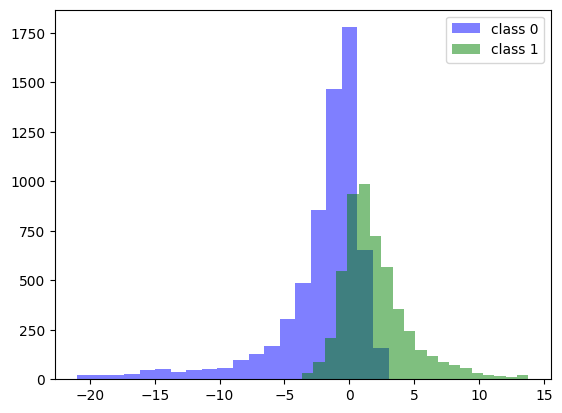

In [ ]:
z_pred = lk1 - lk0

Z0 = z_pred[y_test==0]
Z1 = z_pred[y_test==1]


# Pour limiter l'étendu de la visualisation (existence de valeurs très grandes ou très petites) on filtre les quantiles extrémes.
from scipy.stats.mstats import mquantiles

Z0_quant = mquantiles(Z0, prob=[0.01, 0.99])
Z0 = Z0[Z0 > Z0_quant[0]]
Z0 = Z0[Z0 < Z0_quant[1]]

Z1_quant = mquantiles(Z1, prob=[0.01, 0.99])
Z1 = Z1[Z1 > Z1_quant[0]]
Z1 = Z1[Z1 < Z1_quant[1]]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()


### Régression logistique

Régression logisitique: L'erreur de prédiction est 36.14%


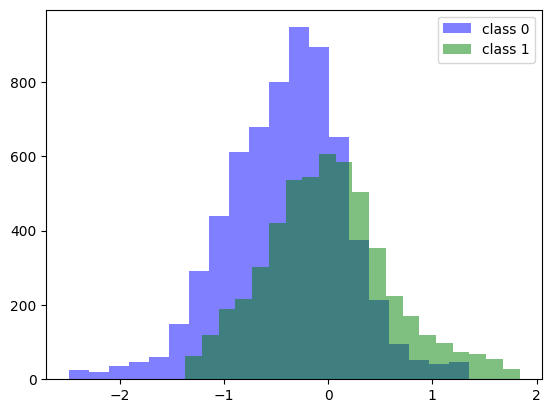

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='liblinear', C=100000).fit(X_train, y_train)
print("Régression logisitique: L'erreur de prédiction est {:.2f}%".format(100*(1-clf.score(X_test, y_test))))

z_pred = clf.decision_function(X_test)

Z0 = z_pred[y_test==0]
Z1 = z_pred[y_test==1]

from scipy.stats.mstats import mquantiles

Z0_quant = mquantiles(Z0, prob=[0.01, 0.99])
Z0 = Z0[Z0 > Z0_quant[0]]
Z0 = Z0[Z0 < Z0_quant[1]]

Z1_quant = mquantiles(Z1, prob=[0.01, 0.99])
Z1 = Z1[Z1 > Z1_quant[0]]
Z1 = Z1[Z1 < Z1_quant[1]]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()



Le modèle Gaussien multivarié est le plus performant avec une erreur de 23,1%, mais toutes les performances restent faibles. Cela s'explique par la complexité des données : le modèle gaussien s'adapte mieux aux distributions normales, tandis que les approches discriminantes et logistiques, sensibles aux frontières linéaires, gèrent mal des distributions complexes.


### Augmentation de caractéristiques + LDA

Dans cette partie, on se propose d'augmenter l'expressivité des caractéristiques en rajoutant des moments d'ordre 2 dans la représentation. Cela peut se faire en utilisant la fonction [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

La logique derrière cette augmentation de représentation est de construire artificiellement une surface de décision plus complexe mais en gardant un mécanisme d'estimation s'appuyant sur des techniques linéaires.

On construit une fonction $\Phi: \mathbf{x} \mapsto \Phi(\mathbf{x}) \in R^m$ qui transforme les données d'origine dans $R^d$ dans une espace $R^m$ où, $m > n$. Par exemple, on va construire des produits de chaque caractéristique $\Phi_k(\mathbf{x}) = x_i.x_j$. La direction de décision $\mathbf{w}$ sera alors à rechercher dans $R^m$ et la fonction de décision:
$$z(\mathbf{x}) = w_0 + w_1.\Phi_1(\mathbf{x}) + \cdots w_k.\Phi_k(\mathbf{x})$$
Si l'on augmente ainsi les représentations, on peut générer des surfaces de décision quadratiques.



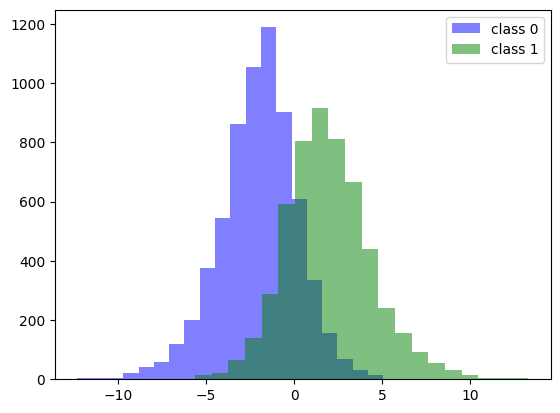

L'erreur de prédiction est 18.25%


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

Xp_train = poly.fit_transform(X_train)
Xp_test = poly.fit_transform(X_test)

clf = LinearDiscriminantAnalysis()
clf.fit(Xp_train, y_train)

z_pred = clf.decision_function(Xp_test)


Z0 = z_pred[y_test==0]
Z1 = z_pred[y_test==1]

from scipy.stats.mstats import mquantiles

Z0_quant = mquantiles(Z0, prob=[0.001, 0.999])
Z0 = Z0[Z0 > Z0_quant[0]]
Z0 = Z0[Z0 < Z0_quant[1]]

Z1_quant = mquantiles(Z1, prob=[0.001, 0.999])
Z1 = Z1[Z1 > Z1_quant[0]]
Z1 = Z1[Z1 < Z1_quant[1]]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()

print("L'erreur de prédiction est {:.2f}%".format(100*(1-clf.score(Xp_test, y_test))))

### Augmentation de caractéristiques + Régression logistique

Même principe mais avec régression logistique. Ici, l'apprentissage de la fonction a nécessité de normaliser les données pour assurer la convergence de l'optimisation.

In [ ]:
poly = PolynomialFeatures(2)

Xp_train = poly.fit_transform(X_train)
Xp_test = poly.fit_transform(X_test)

clf = LogisticRegression(random_state=0, max_iter=1000, solver='liblinear', C=10, penalty='l2')
clf.fit(Xp_train, y_train)

z_pred = clf.decision_function(Xp_test)

print("Régression logisitique: L'erreur de prédiction est {:.2f}%".format(100*(1-clf.score(Xp_test, y_test))))


from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Xp_train)

Xp_scaled = scaler.transform(Xp_train)
Xp_test_scaled = scaler.transform(Xp_test)

clf = LogisticRegression(random_state=0, max_iter=1000, solver='liblinear', C=10000, penalty='l2')
clf.fit(Xp_scaled, y_train)

z_pred = clf.decision_function(Xp_test_scaled)

print("Régression logisitique + augmentation: L'erreur de prédiction est {:.2f}%".format(100*(1-clf.score(Xp_test_scaled, y_test))))


Régression logisitique: L'erreur de prédiction est 34.77%
Régression logisitique + augmentation: L'erreur de prédiction est 16.55%


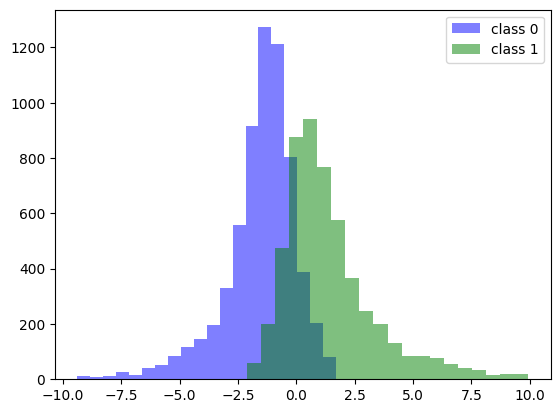

In [ ]:

Z0 = z_pred[y_test==0]
Z1 = z_pred[y_test==1]

from scipy.stats.mstats import mquantiles

Z0_quant = mquantiles(Z0, prob=[0.01, 0.99])
Z0 = Z0[Z0 > Z0_quant[0]]
Z0 = Z0[Z0 < Z0_quant[1]]

Z1_quant = mquantiles(Z1, prob=[0.01, 0.99])
Z1 = Z1[Z1 > Z1_quant[0]]
Z1 = Z1[Z1 < Z1_quant[1]]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()


### SVM

Le prédicteur Support Vector Machines permettent de mieux contrôler la surface discrimante et sa forme.

SVM: L'erreur de prédiction est 5.58%


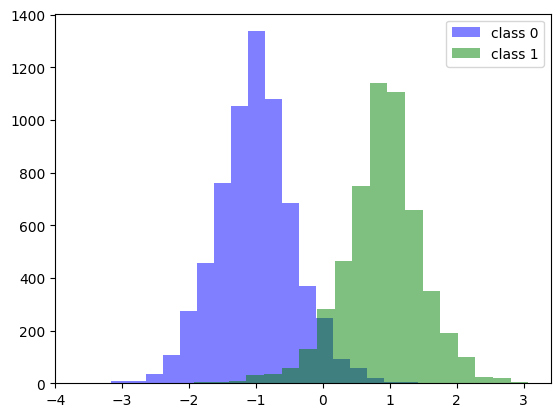

In [ ]:
from sklearn import svm

clf = svm.SVC(shrinking=True,max_iter=1000000,gamma=1e-3, C=3.5, kernel='rbf')

clf.fit(X_train, y_train)
print("SVM: L'erreur de prédiction est {:.2f}%".format(100*(1-clf.score(X_test, y_test))))

z_pred = clf.decision_function(X_test)

a0 = z_pred[y_test==0]
a1 = z_pred[y_test==1]

plt.hist(a0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(a1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()


On voit que le prédicteur SVM donne assez bonnes performances sur ce problème très mélangé.

## Un dataset de très grande dimension

Le nouveau problème d'apprentissage est une classification binaire de textes en provenance de newsgroups, c'est-à-dire des forums de discussion sur une certaine thématique. L'objectif de la classification est de prédire le groupe où le document a été posté uniquement à partir du texte.

Une première étape de mise en forme des données sous forme vectorielle a été réalisée et utilise une technique de "sac de mots" ("bag of words" en anglais). Les données sont de grande dimension **_130107_**.



In [ ]:
import scipy
from sklearn import datasets

X_ori, y_ori = datasets.fetch_20newsgroups_vectorized(subset="all", return_X_y=True)

class0 = 13
class1 = 14

X0 = X_ori[y_ori == class0,:]
X1 = X_ori[y_ori == class1,:]

y_all = np.array([0]*X0.shape[0] + [1]*X1.shape[0])
X_all = scipy.sparse.vstack((X0,X1))

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    random_state=42,
                                                    test_size=0.3)

print("Les données sont de dimension {:d}".format(X_train.shape[1]))
print("Le nombre de données d'apprentissage est {:d}".format(y_train.shape[0]))



Les données sont de dimension 130107
Le nombre de données d'apprentissage est 1383


In [ ]:
# Affichage d'une donnée: elles sont positives et codées par de manière "sparse"
print(type(X_train))
if (np.sum(X_train < 0.0) == 0):
  print("All values are positive")

# Calcul du nombre moyens d'éléments non nuls
non_nul_moyen = np.mean(np.sum(X_train > 0,axis=1))
print("Le nombre moyen de valeurs non nulles par échantillon est {:.1f}".format(non_nul_moyen))


<class 'scipy.sparse._csr.csr_matrix'>
All values are positive
Le nombre moyen de valeurs non nulles par échantillon est 161.0


### Bayésien naïf

In [ ]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

clf = BernoulliNB()
#clf = MultinomialNB()

clf.fit(X_train, y_train)

print("Bayésien naïf: L'erreur de prédiction est {:.2f}%".format(100*(1-clf.score(X_test, y_test))))

Bayésien naïf: L'erreur de prédiction est 1.35%


Pour ce type de données de grande taille mais creuses (beaucoup d'attributs nuls) le bayésien naïf est une solution simple et efficace.